<a href="https://colab.research.google.com/github/adtitovich/dsml-17/blob/main/m6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). 
Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). 
На полученных данных построить модель регрессии и дерево решений.

#Этапы работы:
**1. Получите и загрузите данные.**

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [185]:
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target 
#= fetch_california_housing(return_X_y=True, as_frame=True)

In [186]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**2. Проведите первичный анализ.  
a.Проверьте данные на пропуски. Удалите в случае обнаружения.  
b.*Нормализуйте один из признаков**

In [187]:
# пропусков нет
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [188]:
# Нормализуем признак Population
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [230]:
scaller = RobustScaler()
scaller.set_output(transform = 'pandas')
X['Population'] = scaller.fit_transform(X[['Population']])
X.describe()

<ipython-input-230-6ba1f3090edc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Population'] = scaller.fit_transform(X[['Population']])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,0.276628,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1.207316,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,-1.239872,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,-0.404051,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,0.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,0.595949,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,36.797441,1243.333333,41.950000,-114.310000


**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

**4. Обучите [модель регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на обучающем множестве.**

In [235]:
model_lr = LinearRegression().fit(X_train, y_train)


**5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.**

In [236]:
model_lr.score(X_train, y_train)

0.6071347614353069

In [237]:
model_lr.score(X_test, y_test)

0.5931772566567302

**6. Обучите [дерево решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) на обучающем множестве.  
a. Повторите п. 5 для полученной модели.  
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по [ссылке](https://mljar.com/blog/visualize-decision-tree/).**

In [240]:
# выставим max_depth = 3 для того, что бы график получился читабельный
regr = tree.DecisionTreeRegressor(max_depth = 3)
model_tree = regr.fit(X_train, y_train)

In [245]:
model_tree.score(X_train, y_train)

0.5334542463936784

In [242]:
model_tree.score(X_test, y_test)

0.5291660020076474

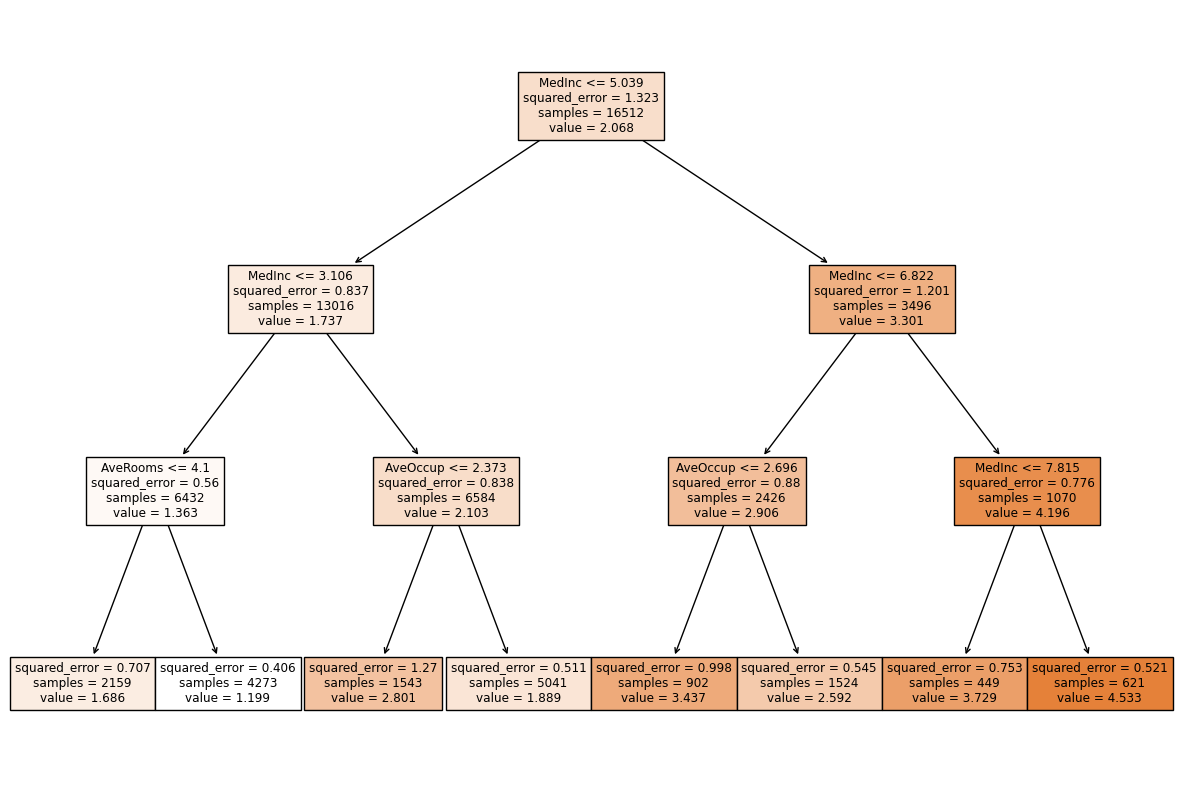

In [246]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regr, feature_names=housing.feature_names, filled=True)

**7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.   
a. Повторите п. 5 для полученной модели.**

In [248]:
# подберем оптимальные параметры max_depth и min_samples_leaf с помощью GridSearchCV
parameters = { 'max_depth': range (1,20),
              'min_samples_leaf': range (1,8)}

regr = tree.DecisionTreeRegressor()
grid = GridSearchCV(regr, parameters, cv=5)
grid.fit(X_train, y_train)

# оптимальные параметры модели
grid.best_params_

{'max_depth': 11, 'min_samples_leaf': 7}

In [249]:
#Посчитаем точность предсказания модели с оптимальными параметрами

regr = tree.DecisionTreeRegressor(max_depth = 11, min_samples_leaf = 7)
model_tree = regr.fit(X_train, y_train)

In [250]:
model_tree.score(X_train, y_train)

0.8334125453457708

In [251]:
model_tree.score(X_test, y_test)

0.7203999996589341

**Сформулируйте выводы по проделанной работе.   
a. Сравните точность двух моделей.**

In [252]:
pd.DataFrame({'Обучение':[model_lr.score(X_train, y_train), model_tree.score(X_train, y_train)], 'Тест':[model_lr.score(X_test, y_test), model_tree.score(X_test, y_test)]}, index = ['линейная регрессия', 'дерево решений'])

,Обучение,Тест
линейная регрессия,0.607135,0.593177
дерево решений,0.833413,0.720400
